# Exercise on data handling and analysis

In this exercise, you will work on data analysis, and learn how to handle, visualize and cluster data.

The goal is to learn:
*	how to use `pandas` DataFrames to handle data in Python
*	how to visualize data using the `seaborn` package
*	how to use clustering algorithms available in `scikit-learn` to group data points.
*	how to use dimensionality reduction also in scikit-learn to improve visualization and extract relevant features.


## 1. Plotting the data
In the first part of this exercise we will use `pandas` DataFrames to store and manipulate the data and use `seaborn` to produce nice visualizations of the data.

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data to a pandas DataFrame using the read_csv method.

# filename='~/Downloads/heart.csv'
train = pd.read_csv('heart_data.csv')
train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Description of columns

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

The column names are abbreviations, we can change the column names by providing a list of equal size with the new names, like so:



In [4]:
train.columns = ['age', 'sex', 'chest_pain_type',
                 'resting_blood_pressure', 'cholesterol',
                 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
                 'exercise_induced_angina', 'st_depression', 'st_slope',
                 'num_major_vessels', 'thalassemia', 'target']

# make a copy before changing.
train_orig = train.copy()


In addition as suggested by https://www.kaggle.com/code/bjornwallner/what-causes-heart-disease-explaining-the-model/, the categorical can be changed to the actual category to make them easier to interpret.

To change values in a DataFrame it is safest to use the .loc method, even if the syntax is a bit odd.

In [5]:
# Example
# This will change the values of rows that statisfy the train['sex']==0/1 condition
# the .loc method is needed to access the right elements, otherwise you will get a warning
# that you are working on a copy
# if you do train['sex'][train['sex']==1]='male'

train.loc[train['sex'] == 0, 'sex'] = 'female'
train.loc[train['sex'] == 1, 'sex'] = 'male'
train


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
# This will change the other values
train.loc[train['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
train.loc[train['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
train.loc[train['chest_pain_type'] == 3,
          'chest_pain_type'] = 'non-anginal pain'
train.loc[train['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

train.loc[train['fasting_blood_sugar'] == 0,
          'fasting_blood_sugar'] = 'lower than 120mg/ml'
train.loc[train['fasting_blood_sugar'] == 1,
          'fasting_blood_sugar'] = 'greater than 120mg/ml'

train.loc[train['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
train.loc[train['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
train.loc[train['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

train.loc[train['exercise_induced_angina']
          == 0, 'exercise_induced_angina'] = 'no'
train.loc[train['exercise_induced_angina']
          == 1, 'exercise_induced_angina'] = 'yes'

train.loc[train['st_slope'] == 1, 'st_slope'] = 'upsloping'
train.loc[train['st_slope'] == 2, 'st_slope'] = 'flat'
train.loc[train['st_slope'] == 3, 'st_slope'] = 'downsloping'

train.loc[train['thalassemia'] == 1, 'thalassemia'] = 'normal'
train.loc[train['thalassemia'] == 2, 'thalassemia'] = 'fixed defect'
train.loc[train['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'
train


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,0,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,flat,2,reversable defect,0
1,53,male,0,140,203,greater than 120mg/ml,normal,155,yes,3.1,0,0,reversable defect,0
2,70,male,0,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,0,0,reversable defect,0
3,61,male,0,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,flat,1,reversable defect,0
4,62,female,0,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,upsloping,3,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,typical angina,140,221,lower than 120mg/ml,ST-T wave abnormality,164,yes,0.0,flat,0,fixed defect,1
1021,60,male,0,125,258,lower than 120mg/ml,normal,141,yes,2.8,upsloping,1,reversable defect,0
1022,47,male,0,110,275,lower than 120mg/ml,normal,118,yes,1.0,upsloping,1,fixed defect,0
1023,50,female,0,110,254,lower than 120mg/ml,normal,159,no,0.0,flat,0,fixed defect,1


# LOOK AT THE DATA! 
Now lets look at the data. If you should only learn one thing from this course. It would be: LOOK AT THE DATA. It might seem obvious, but you will be surprised how often I found out that it is very common to not look at the data. In particular, if it might seem hard to visualize. 


To get a quick view of data you can use the `pairplot` https://seaborn.pydata.org/generated/seaborn.pairplot.html
by default it will produce all vs all scatterplots, and distributions on the diagonal. For the variables that are numerical and not categorical.



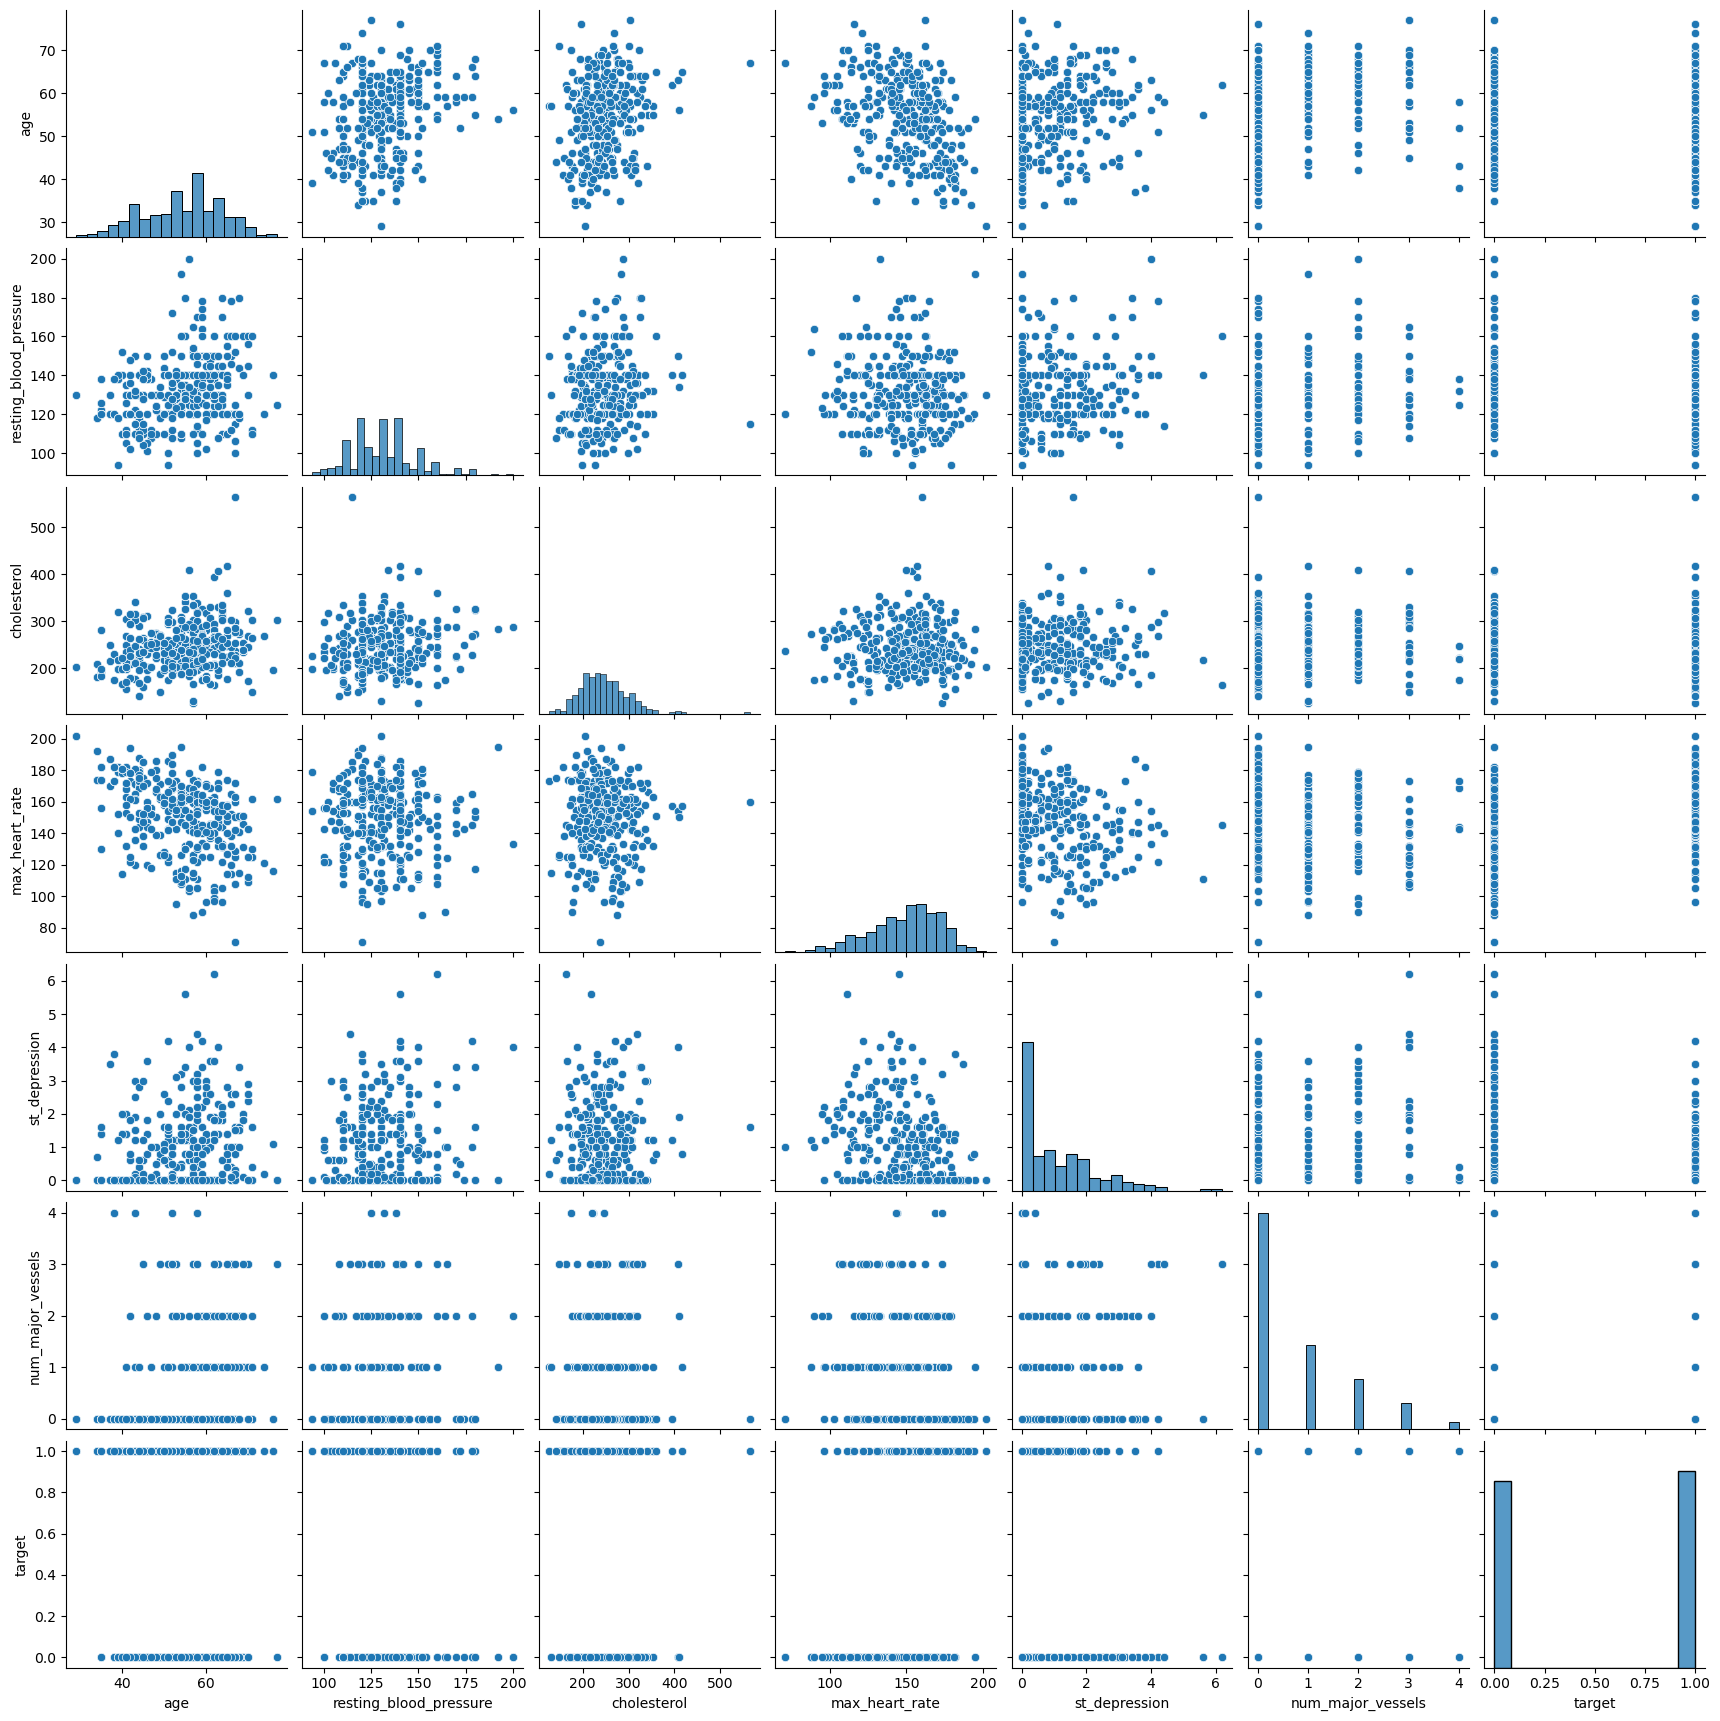

In [7]:
sns.pairplot(train)


Obviously if you have many variables there will be many plots... you can limit the variables to use by `x_vars` and `y_vars` and you can use `hue` to control the coloring

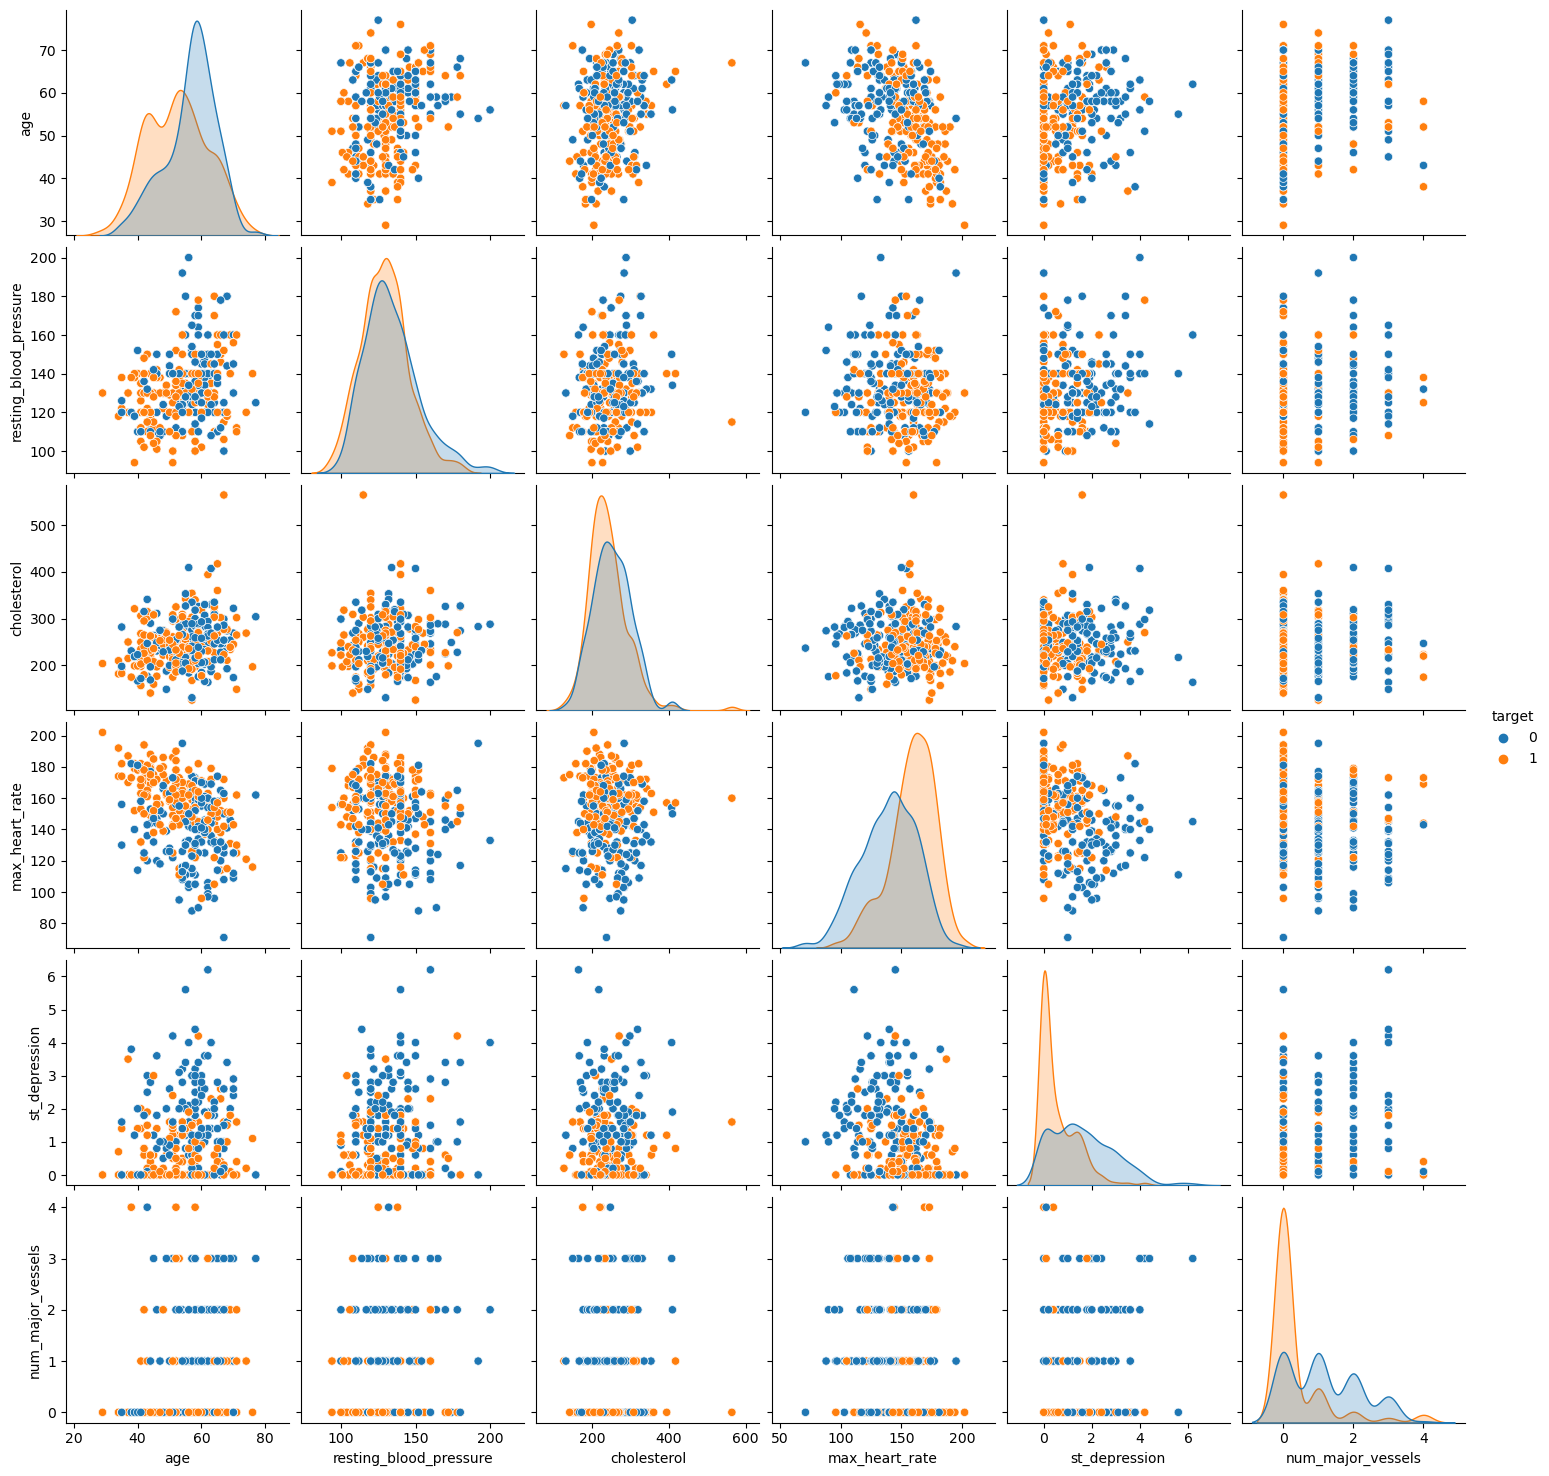

In [8]:
# color by target
sns.pairplot(train, hue='target')

# 'age' against all
# sns.pairplot(train,x_vars=['age'],hue='target')


Plot the distribution of all columns containing continuous values using `histplot` <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank">https://seaborn.pydata.org/generated/seaborn.histplot.html</a> 


If you get an error because of missing values; use the `dropna()` method to remove rows corresponding to missing values, e.g `df['key'].dropna()`



<AxesSubplot:xlabel='age', ylabel='Count'>

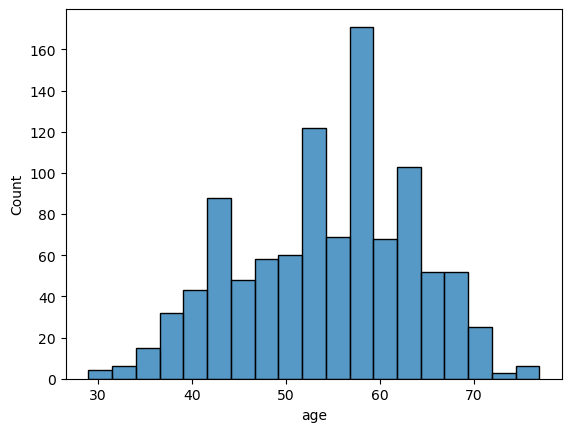

In [9]:
# EXAMPLE
sns.histplot(data=train, x='age')


<AxesSubplot:xlabel='age', ylabel='Count'>

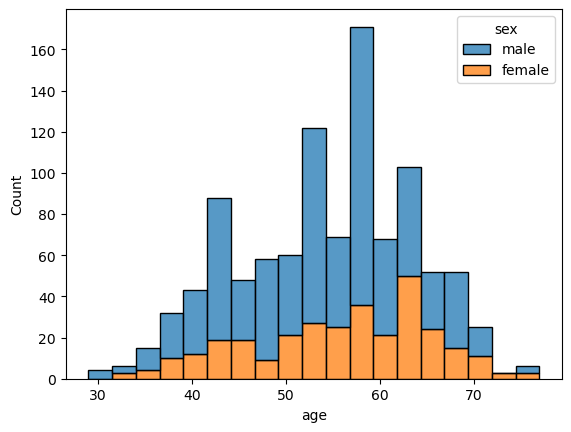

In [10]:
# It is possible to use the 'hue' to control the color of additional variables
# the `multiple`control how to place the multiple categoricals in the `hue`
sns.histplot(data=train, x='age', hue='sex', multiple='stack')


<AxesSubplot:xlabel='age', ylabel='Count'>

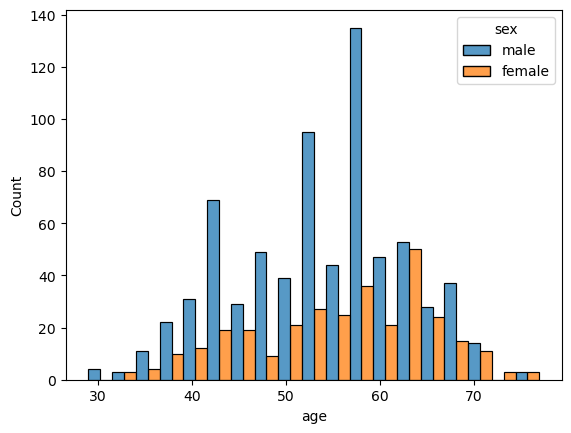

In [11]:
sns.histplot(data=train, x='age', hue='sex', multiple='dodge')


<Axes: xlabel='age', ylabel='Count'>

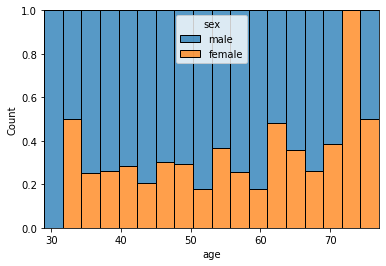

In [10]:
sns.histplot(data=train, x='age', hue='sex', multiple='fill')


<AxesSubplot:xlabel='max_heart_rate', ylabel='Count'>

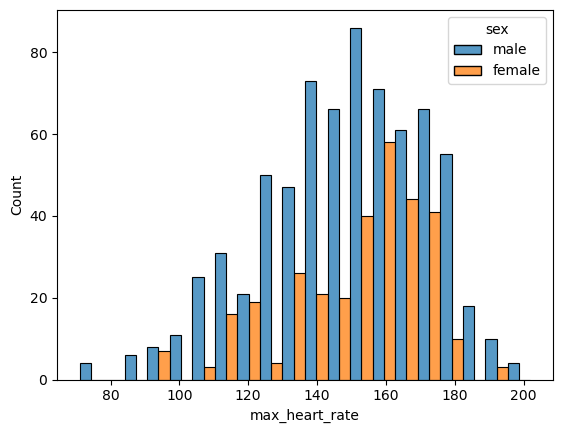

In [13]:
# make a histogram for the 'max_heart_rate column
# Add code below
sns.histplot(data=train, x='max_heart_rate', hue='sex', multiple='dodge')

In [ ]:
# Add hue on 'sex'
# Add code below


Use the `pandas` `sort_values` https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html" target="_blank">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html </a> method to find the the highest and lowest heart rate.

In [14]:
# code below for lowest
## find the highest and lowest heart rate
highest = train['max_heart_rate'].max()
lowest = train['max_heart_rate'].min()


71

In [ ]:
# code below for highest


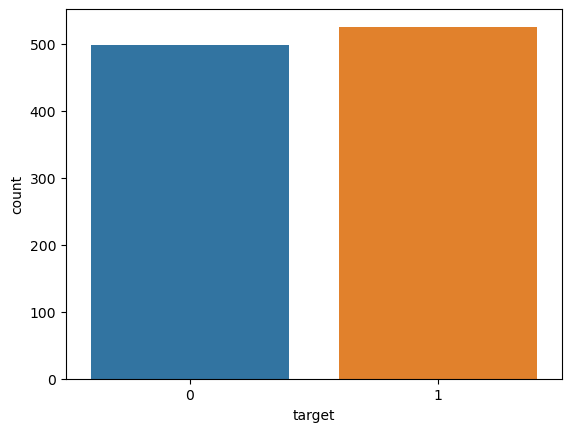

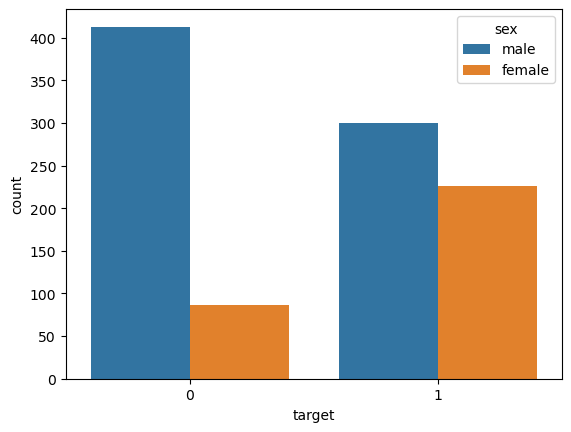

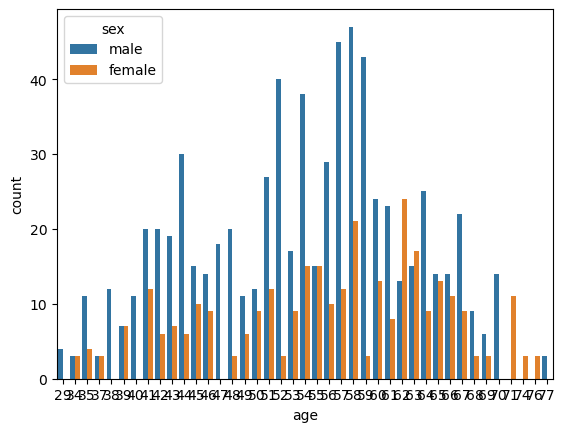

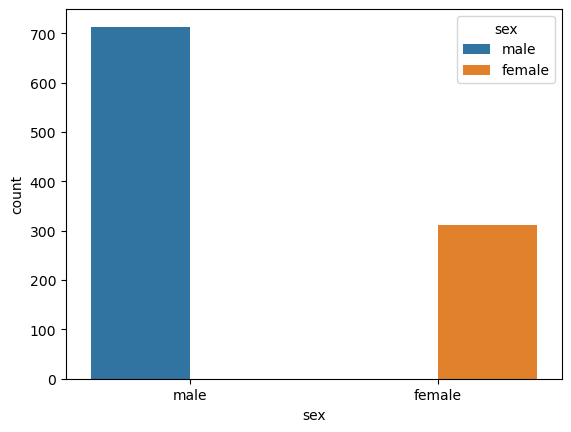

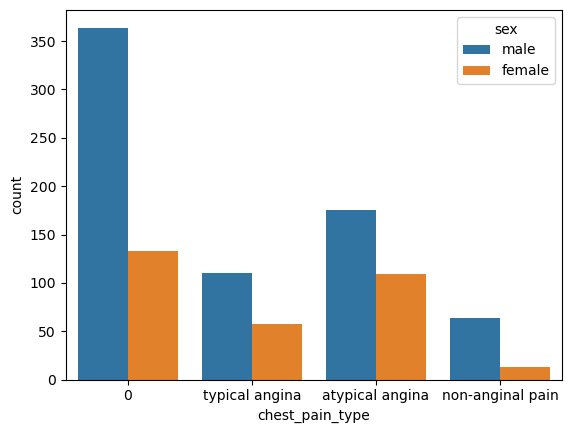

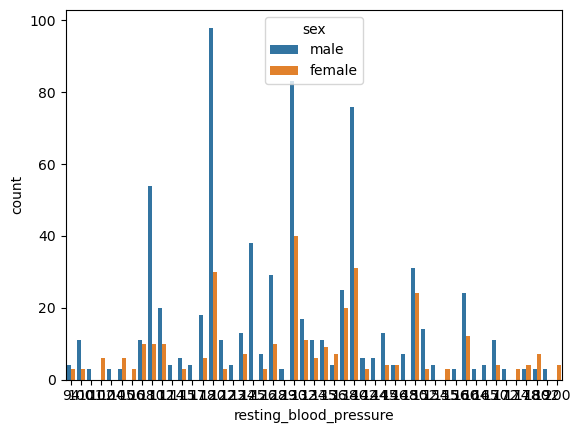

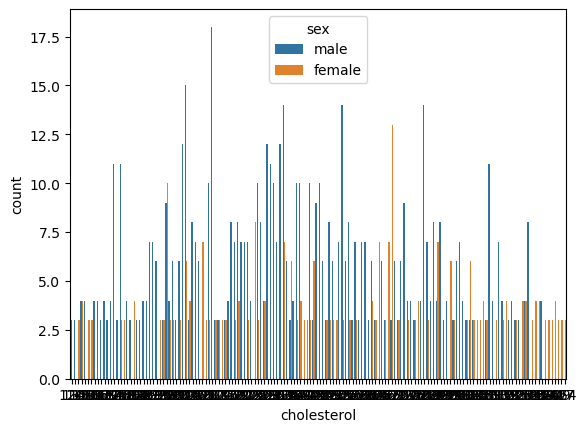

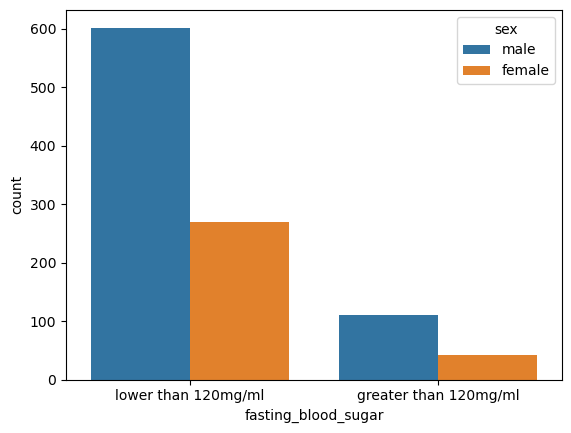

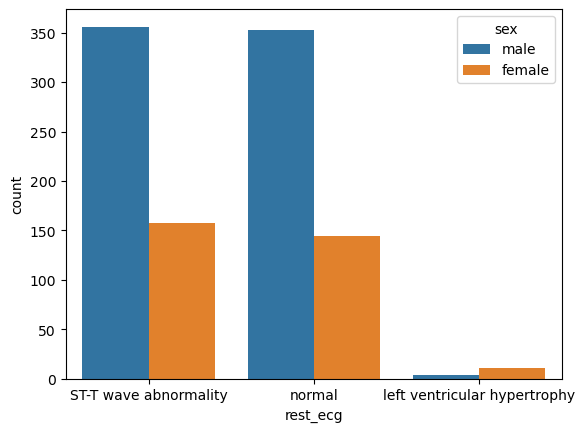

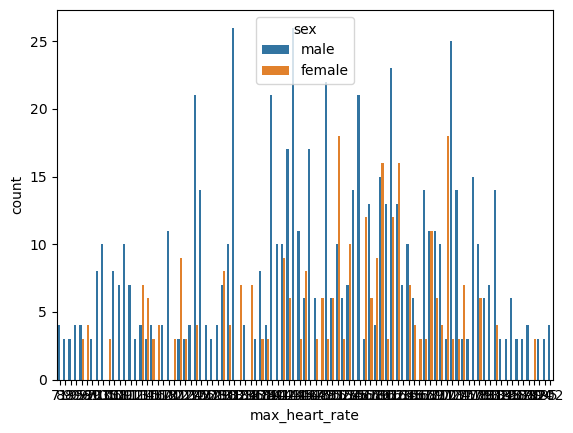

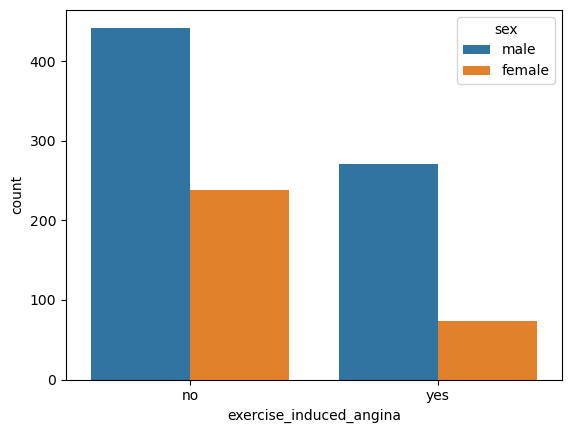

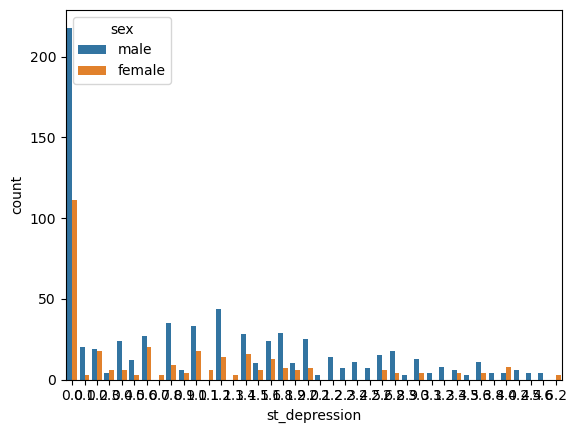

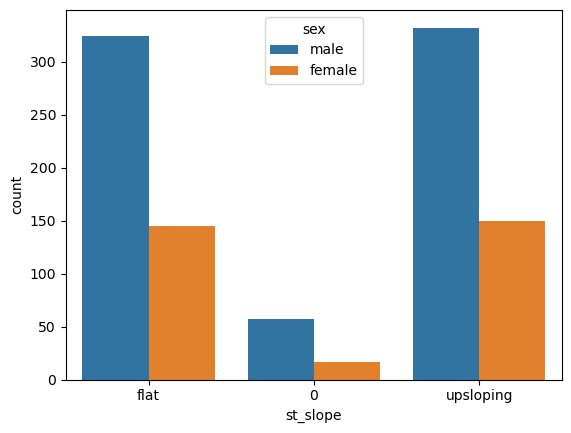

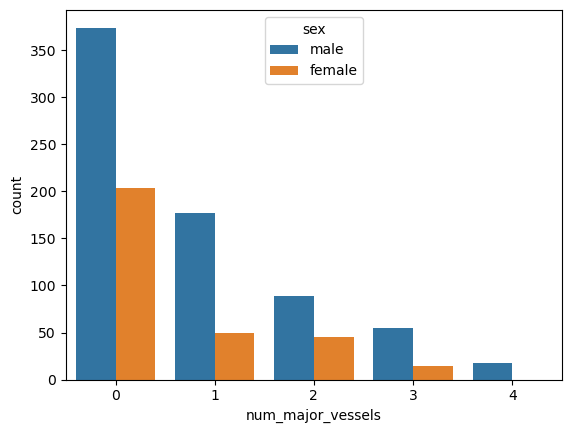

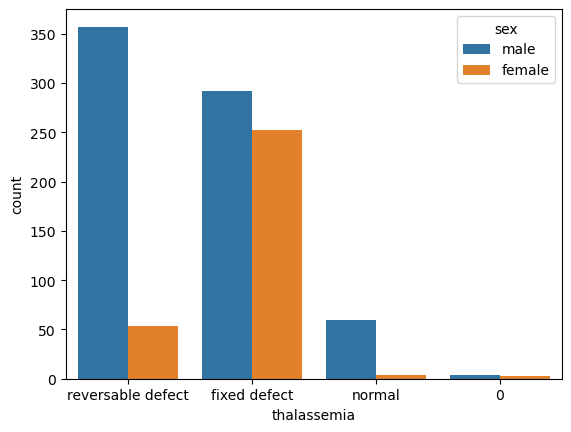

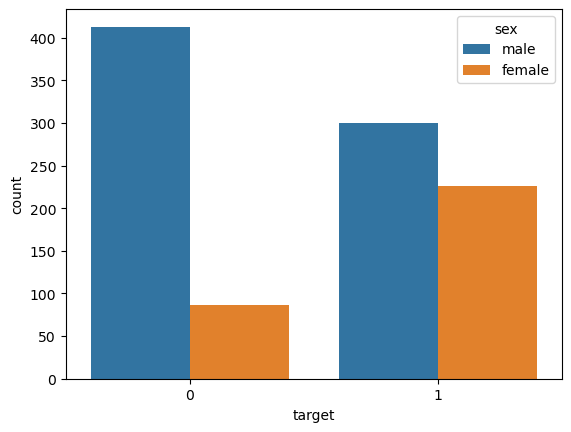

age                        None
sex                        None
chest_pain_type            None
resting_blood_pressure     None
cholesterol                None
fasting_blood_sugar        None
rest_ecg                   None
max_heart_rate             None
exercise_induced_angina    None
st_depression              None
st_slope                   None
num_major_vessels          None
thalassemia                None
target                     None
dtype: object

In [15]:
# Example
sns.countplot(x="target", data=train)
plt.show()
sns.countplot(x="target", hue='sex', data=train)
plt.show()

# add code below for other columns
def plot_count(data, column):
    sns.countplot(x=column, hue='sex', data=train)
    plt.show()
## apply the function to the columns
## use pandas apply method
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
train.apply(lambda x: plot_count(train, x.name))



Use `barplot` <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" target="_blank">https://seaborn.pydata.org/generated/seaborn.barplot.html</a> to show disease for different subsets of the data.

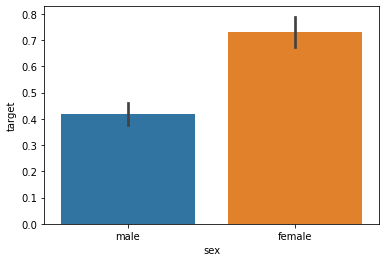

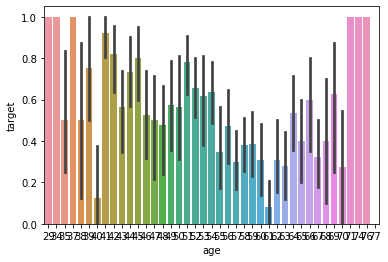

In [12]:
# EXAMPLE
plt.clf()
g = sns.barplot(x="sex", y="target", data=train)
plt.show()
g = sns.barplot(x="age", y="target", data=train)
plt.show()
#################
# add code below for other columns


Use `boxplot` and `violinplot` to visualize the relation between `num_major_vessels` and `cholesterol` or `max_heart_rate`

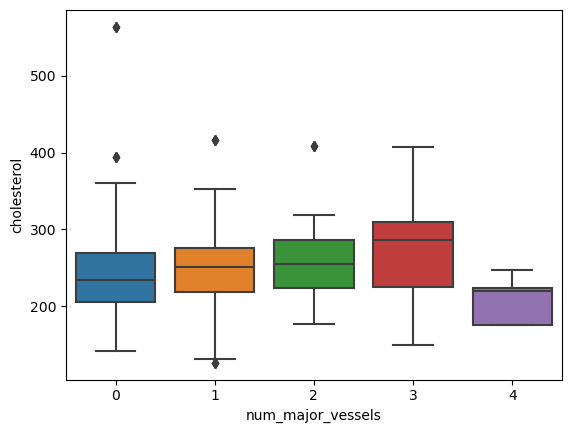

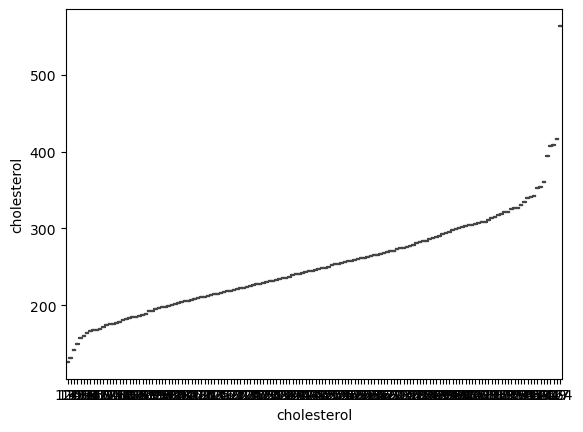

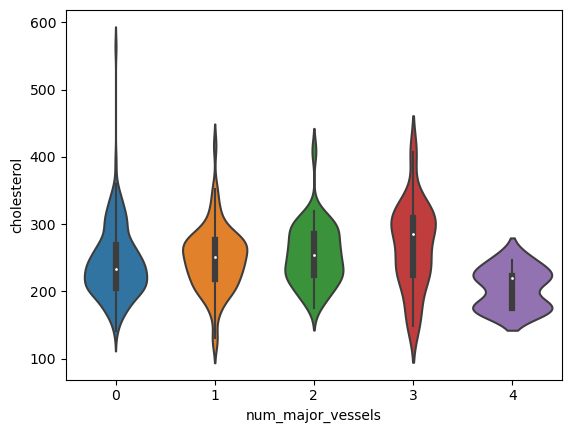

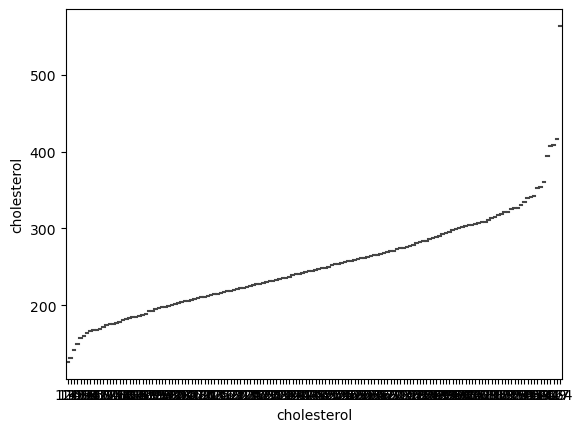

In [16]:
# Add code below
# sns.boxplot
## boxplot for num_major_vessels
sns.boxplot(x='num_major_vessels', y='cholesterol', data=train)
plt.show()
# boxplot for cholesterol
sns.boxplot(x='cholesterol', y='cholesterol', data=train)
plt.show()
# Add code below
# sns.violinplot
## violinplot for num_major_vessels
sns.violinplot(x='num_major_vessels', y='cholesterol', data=train)
plt.show()
# violinplot for cholesterol
sns.violinplot(x='cholesterol', y='cholesterol', data=train)
plt.show()



We introduced categoricals to simplify the understanding of the variables, if we want to do calculations we need to transform the categoricals into dummy/indicator values.

This is performed using the method `pd.get_dummies` https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


In [17]:
df = pd.get_dummies(train)
df


,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_0,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,62,138,294,106,1.9,3,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1021,60,125,258,141,2.8,1,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
1022,47,110,275,118,1.0,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
1023,50,110,254,159,0.0,0,1,1,0,1,...,1,1,0,0,1,0,0,1,0,0


## 2. Clustering
Here we will perform some clustering on the data to see which rows are similar. But before we do the clustering we will scale all features between 0-1 using min-max scaling. The reason to do scaling is to put all features on the same scale, for instance the "age" and "max_heart_rate" columns have quite high values compared to the yes/no features.

Use the MinMaxScalar in the sklearn.preprocessing module
<a href=http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html target="_blank">
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html</a> to scale the values between 0-1

The following code snippet will scale a pandas dataframe


In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Uncomment and add your own columns to the trainable_cols list:
cols_to_scale = [c for c in df.columns if c != 'target']


# trainable_cols_target=trainable_cols + ["survived"]
# train_target=train[trainable_cols_target].dropna()

# Make of the copy of original data
# df_scaled=train_target[trainable_cols].copy()

df_scaled = df[cols_to_scale].copy()
# Define the Scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
df_scaled.loc[:, cols_to_scale] = min_max_scaler.fit_transform(
    df_scaled[cols_to_scale].values)
# df_scaled2[cols]=min_max_scaler.fit_transform(df_scaled.values)
# Show the scaled DataFrame
df_scaled


,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_0,chest_pain_type_atypical angina,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_0,st_slope_flat,st_slope_upsloping,thalassemia_0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,0.479167,0.292453,0.196347,0.740458,0.161290,0.50,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.500000,0.433962,0.175799,0.641221,0.500000,0.00,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.854167,0.481132,0.109589,0.412214,0.419355,0.00,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.509434,0.175799,0.687023,0.000000,0.25,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.687500,0.415094,0.383562,0.267176,0.306452,0.75,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.433962,0.216895,0.709924,0.000000,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1021,0.645833,0.292453,0.301370,0.534351,0.451613,0.25,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1022,0.375000,0.150943,0.340183,0.358779,0.161290,0.25,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1023,0.437500,0.150943,0.292237,0.671756,0.000000,0.00,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Using the normalized (scaled) data we will apply KMeans clustering 
<a href=http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html</a> to see how it divides up the data. In KMeans you have to decide how many clusters you want beforehand, we will try to divide the data into `n_clusters=[2, 3, 4, 5]` clusters and then look and see what information it has divided up. Example below for `n_cluster=2`

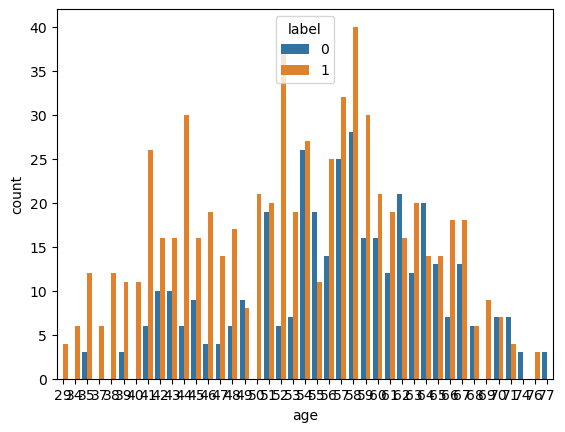

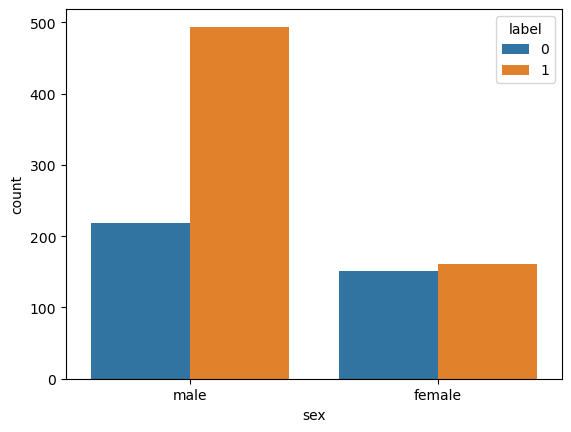

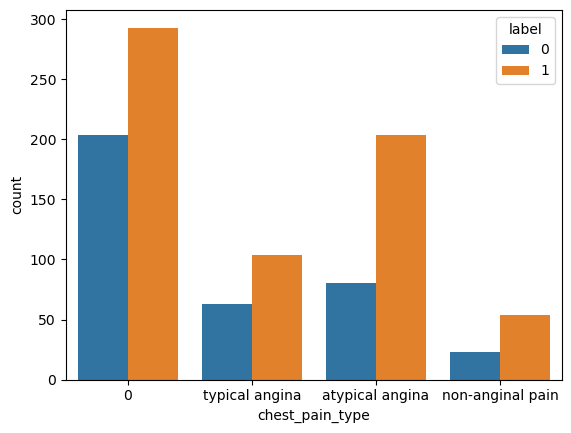

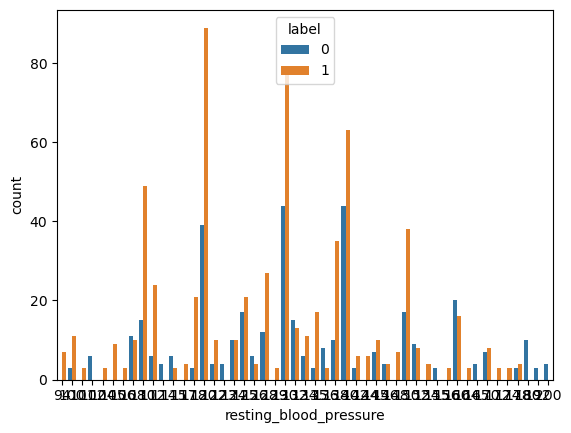

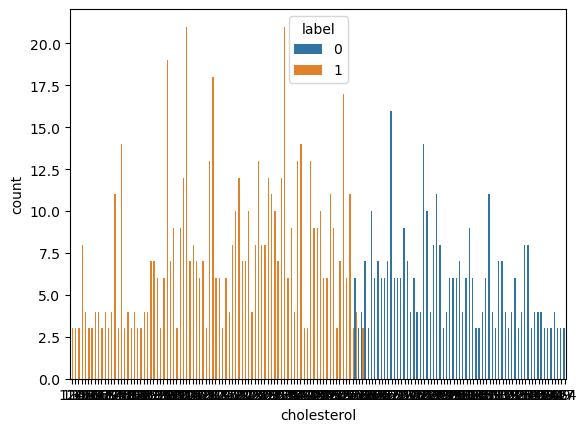

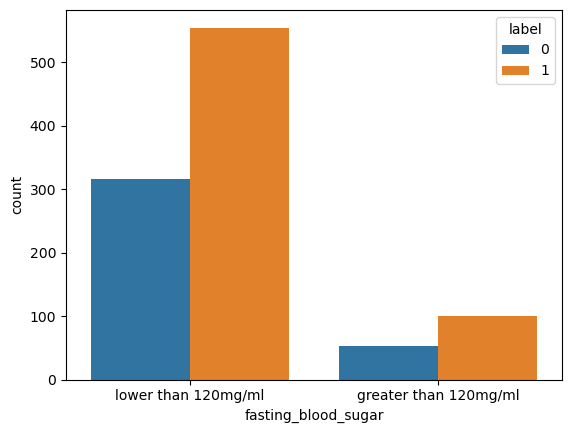

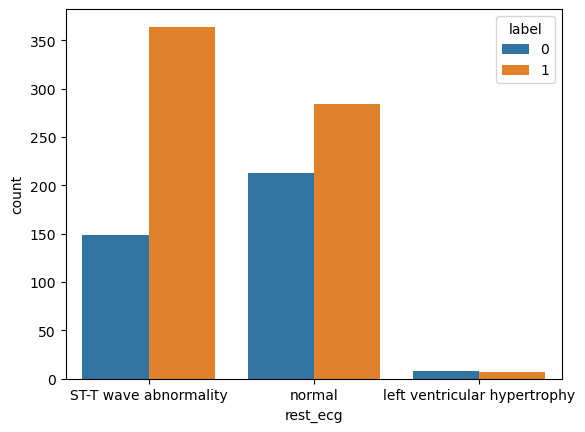

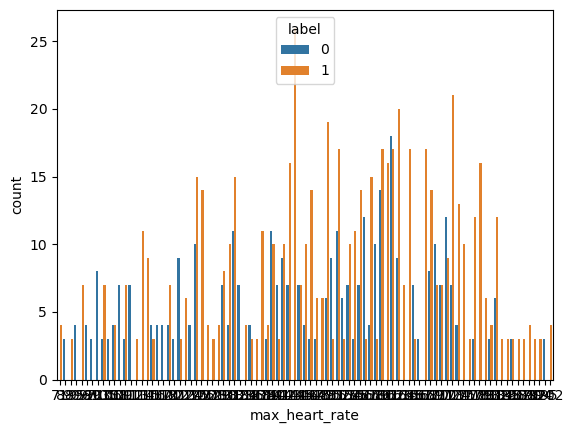

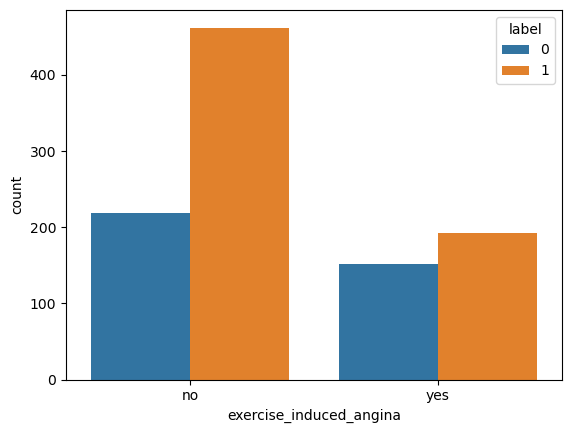

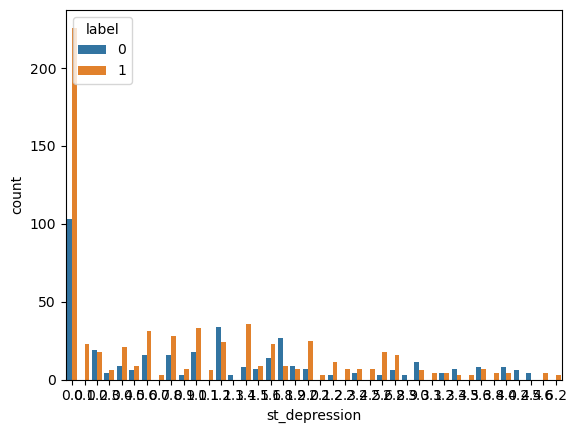

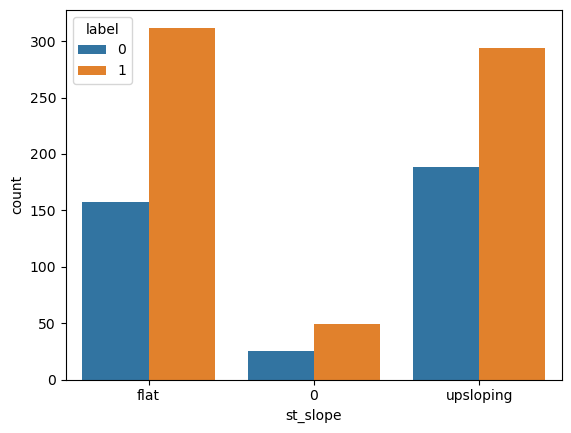

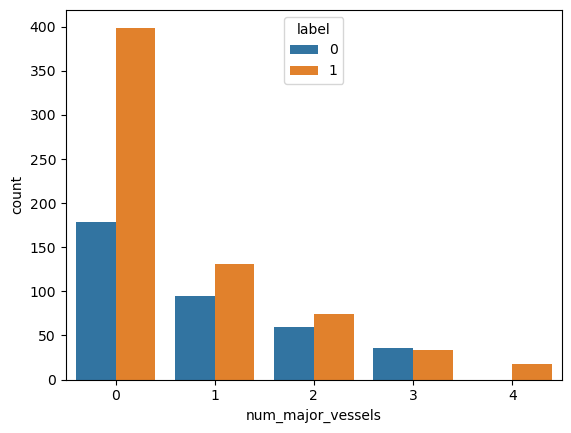

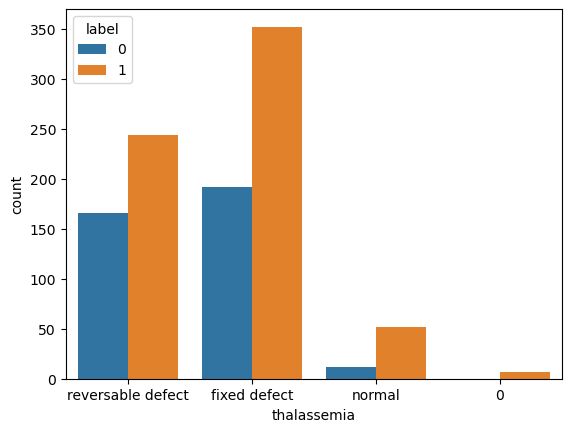

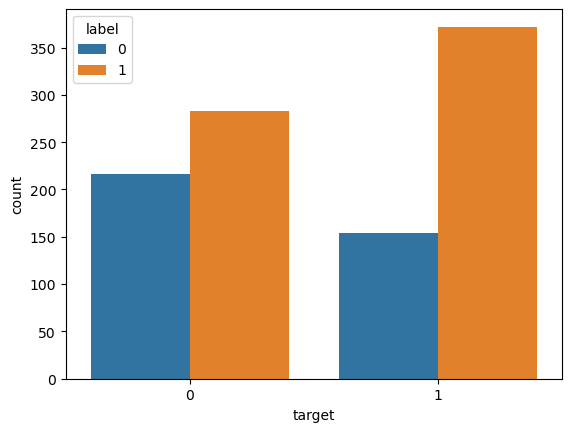

In [19]:
from sklearn.cluster import KMeans
df_ = df_scaled

# This will cluster df into 2 groups
kmeans = KMeans(n_clusters=2, random_state=0).fit(df.values)
# This will add a new column to the DataFrame with the clustering labels [0,1] in the case of n_clusters=2
df_['label'] = kmeans.labels_
train_ = train.copy()
# Add in the cluster label to the rows in the data
train_['label'] = kmeans.labels_
# Plot the 'labels' on the variables

for col in train_.columns:
    if 'label' in col:
        continue
    sns.countplot(x=col, hue="label", data=train_)
    plt.show()


Now try for `n_cluster=3,4,5,6` it likely that you need to plot several countplots to see how it has splitted the data now.

## PCA, Principal component analysis

Make a principle component analysis of the data using the PCA module in scikit-learn
<a href=http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html</a> 


* How many components are needed to explain > 90% of the variance?
* Project the compontents on to the data using the `transform` method
* Add the projected components to the pandas dataframe so you can plot them easily using `seaborn` and the `lmplot` method in the `seaborn` package


 


In [20]:
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = df_scaled
# df=pd.read_csv(filename)
print(df.columns)
pca = PCA(n_components=2)  # Change the number of components
X = pca.fit(df.values).transform(df.values)

# If you haven't used f-strings before, now is the time to start... they rock!
print(f'Explained variance ratio per PC: {pca.explained_variance_ratio_}')
print(f'Explained variance: {np.sum(pca.explained_variance_ratio_)}')

# Add the PCA projections to the DataFrame with the columns PC1, PC2, PC3 etc.
(n, c) = X.shape
train_target = train.copy()
for i in range(c):
    pc_name = f'PC{i+1}'
    print(f'Saving {pc_name}')
    train_target[pc_name] = X[:, i]


Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'num_major_vessels', 'sex_female', 'sex_male',
       'chest_pain_type_0', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_greater than 120mg/ml',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_0', 'st_slope_flat', 'st_slope_upsloping', 'thalassemia_0',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'label'],
      dtype='object')
Explained variance ratio per PC: [0.24286559 0.13802539]
Explained variance: 0.38089098918828324
Saving PC1
Saving PC2


* Use the `hue` option to color the points in the plot differently based on columns like this: `sns.lmplot(x='PC1',y='PC2',hue='sex',data=df,fit_reg=False)`
* Can you see what characterisics of the data the components are capturing? Hint: you can also look at the actual principal compentent vector using `print (pca.components_)` if your `PCA` object is called `pca`, to see which values would dominate in the projection. This only works if there are few values that stand out.

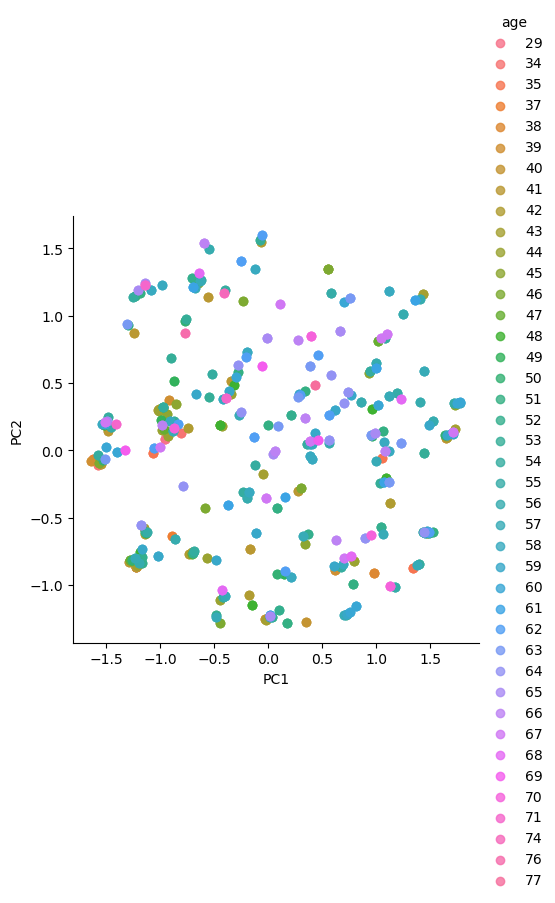

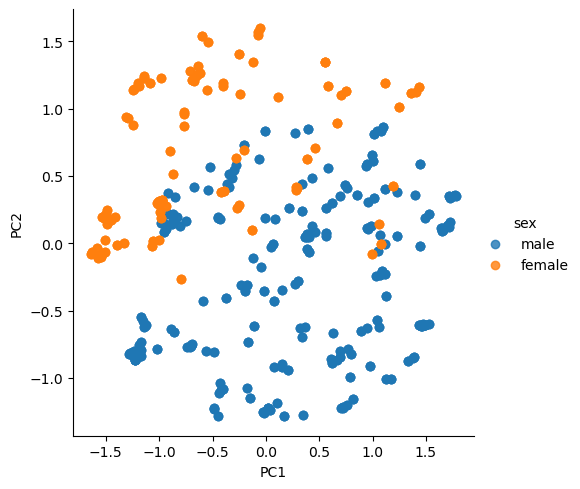

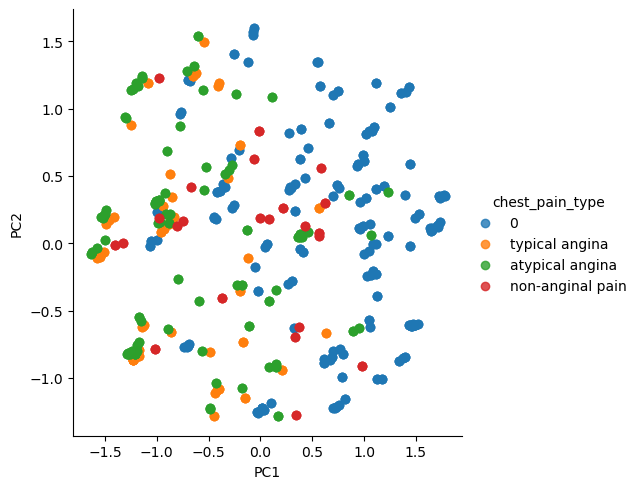

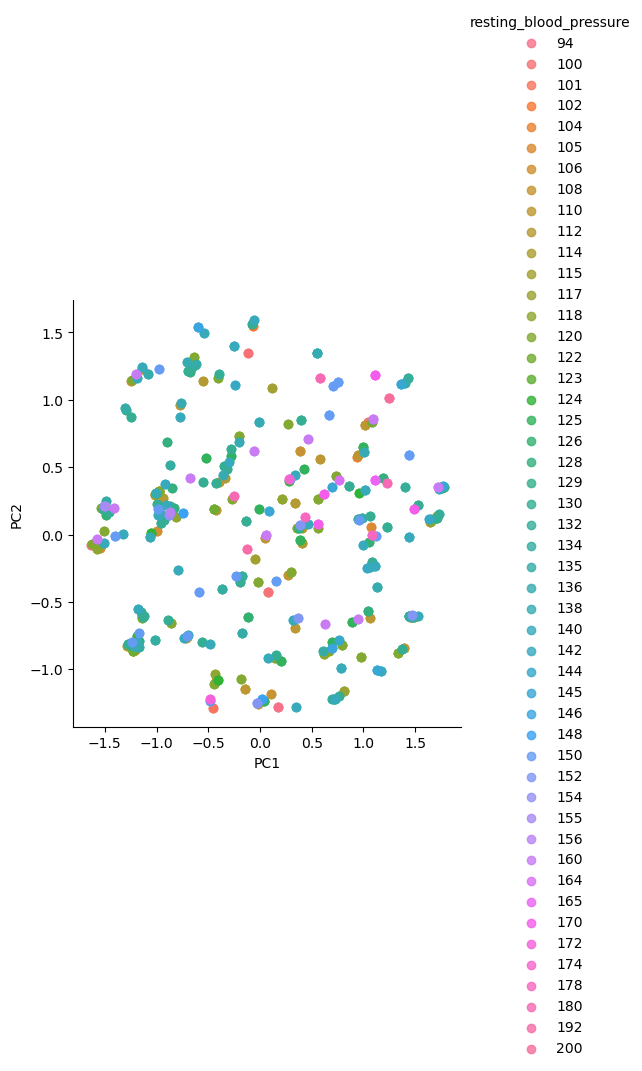

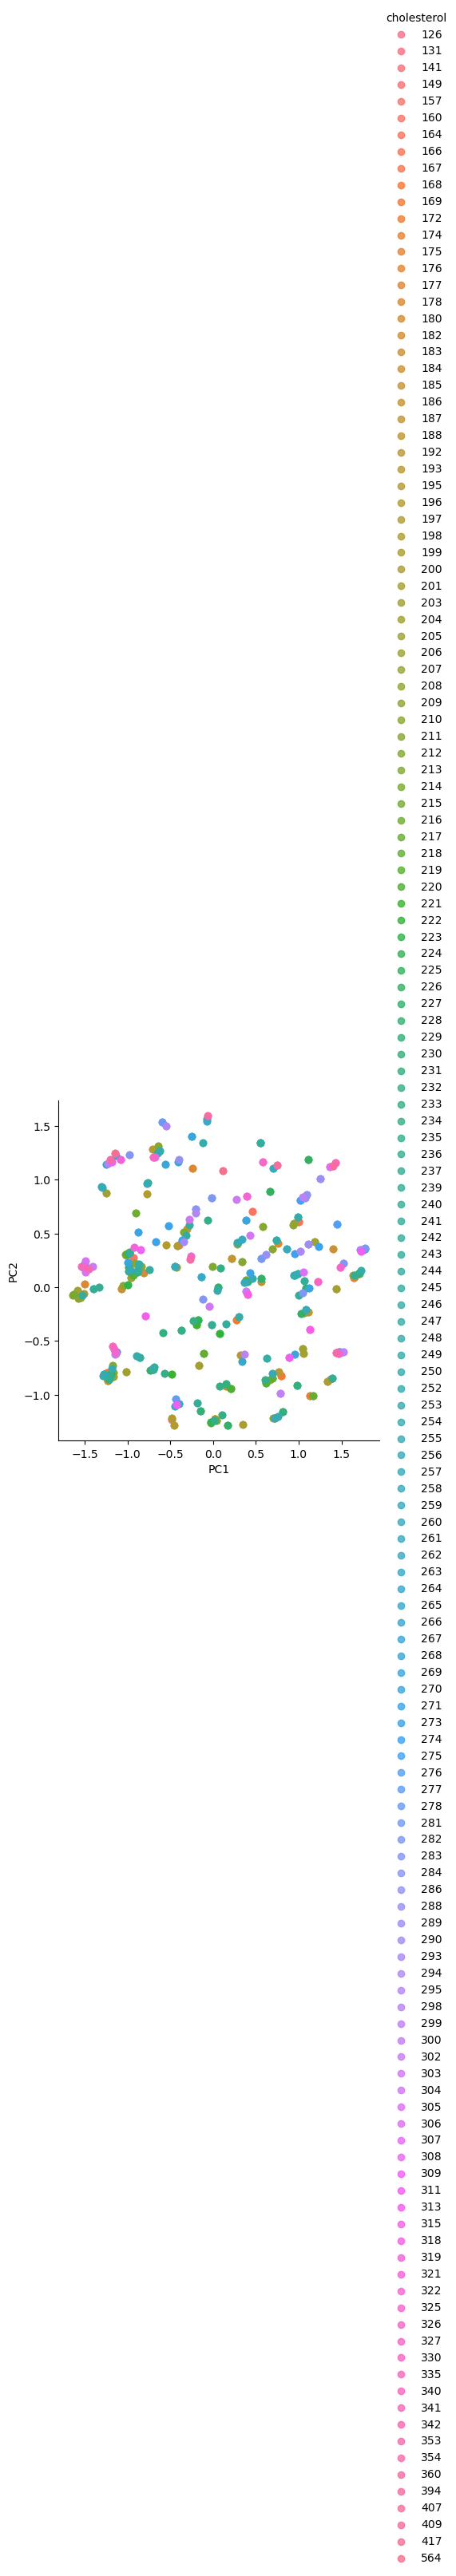

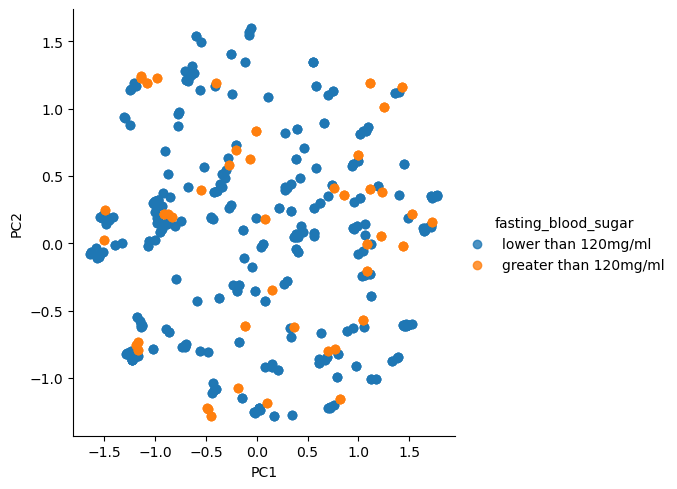

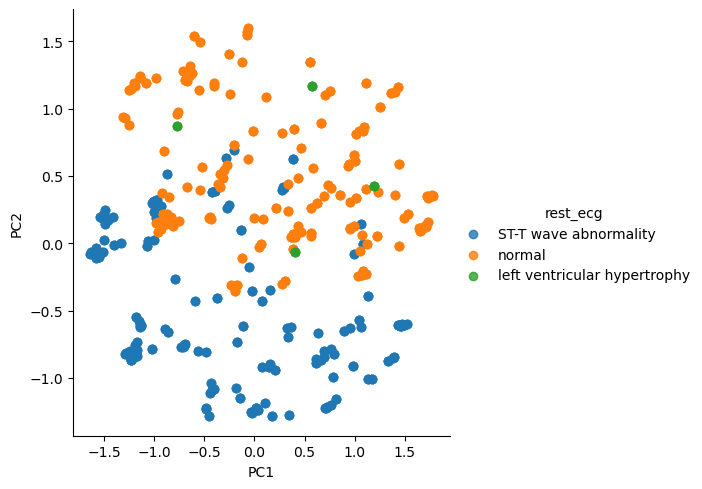

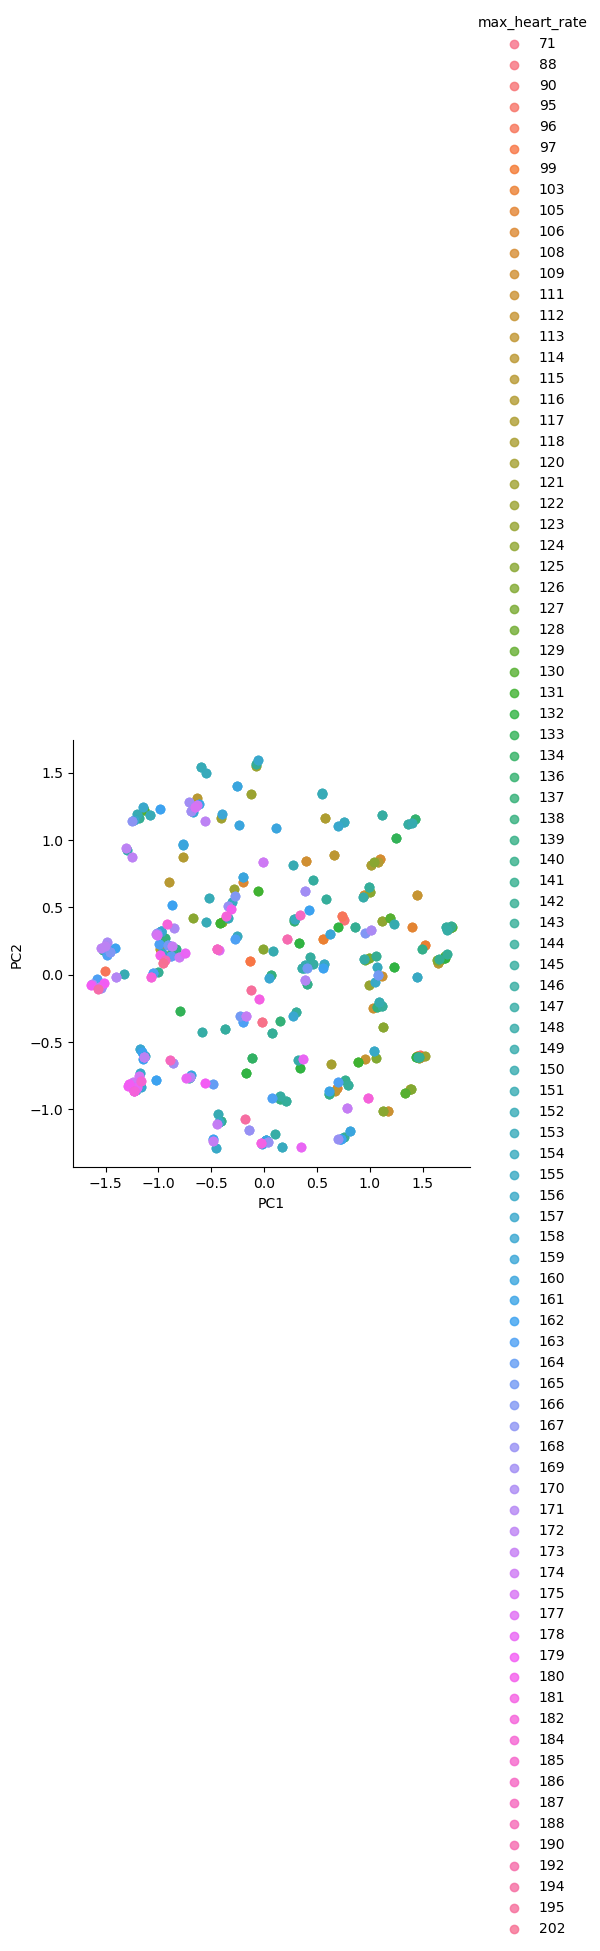

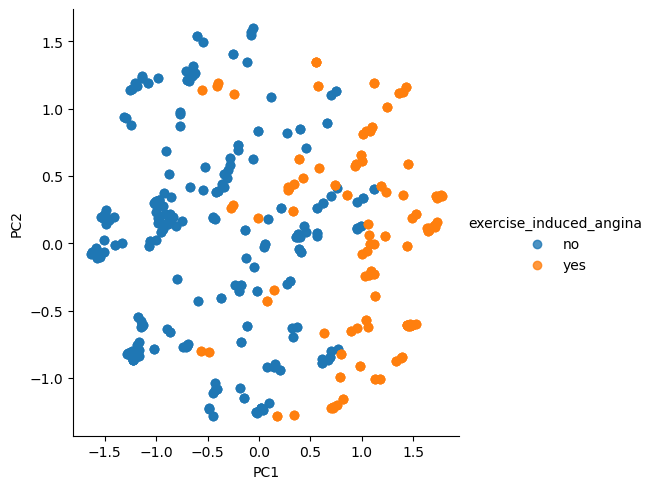

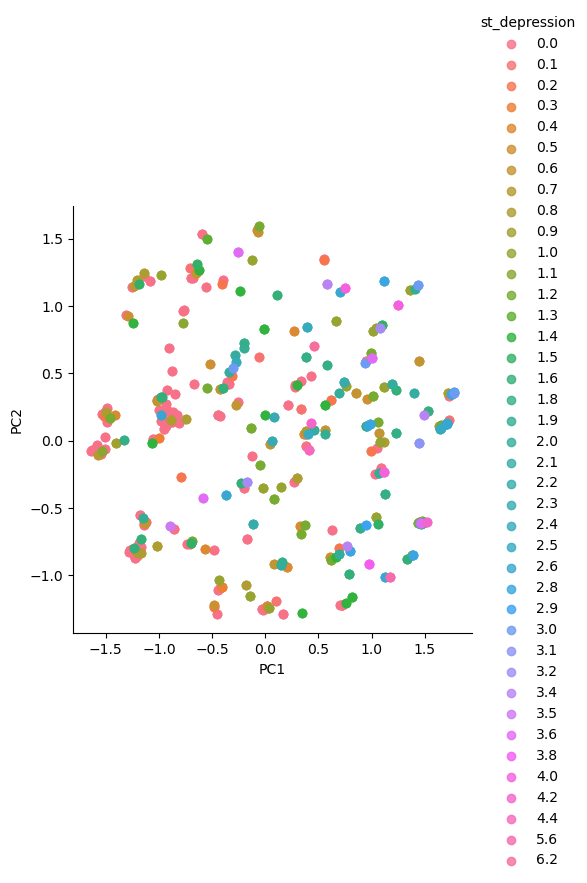

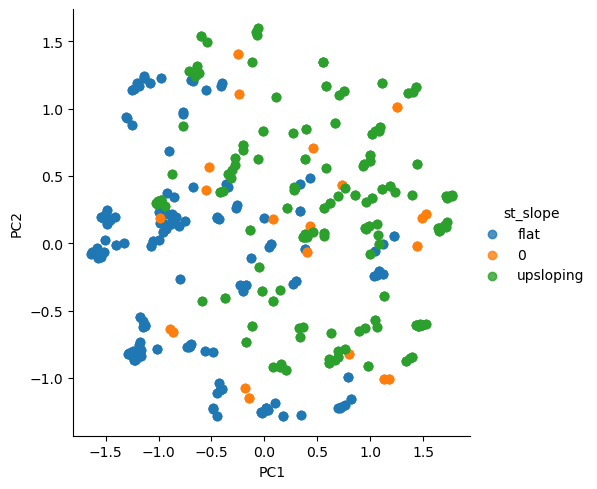

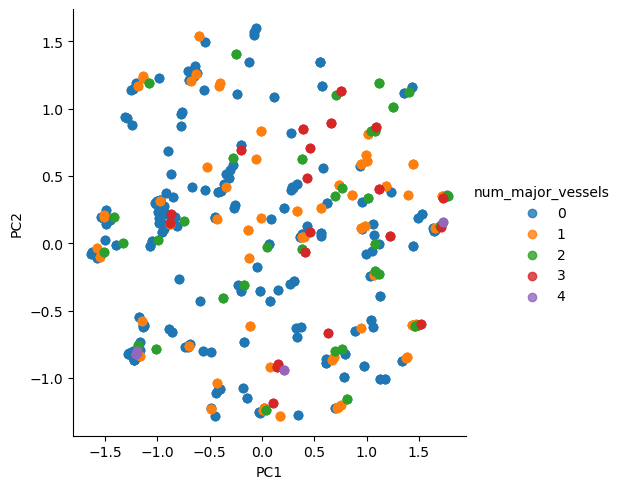

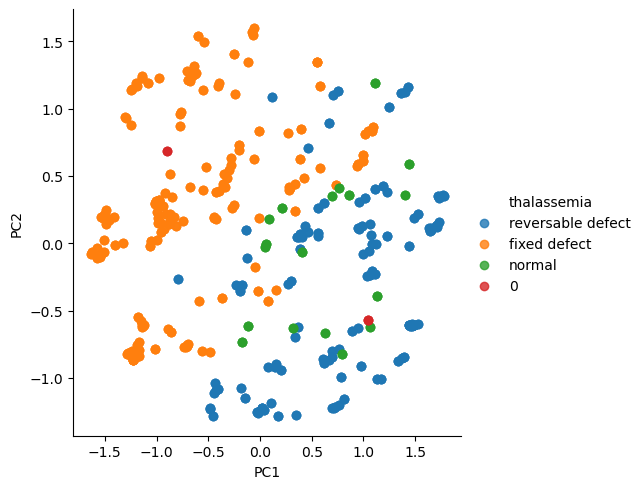

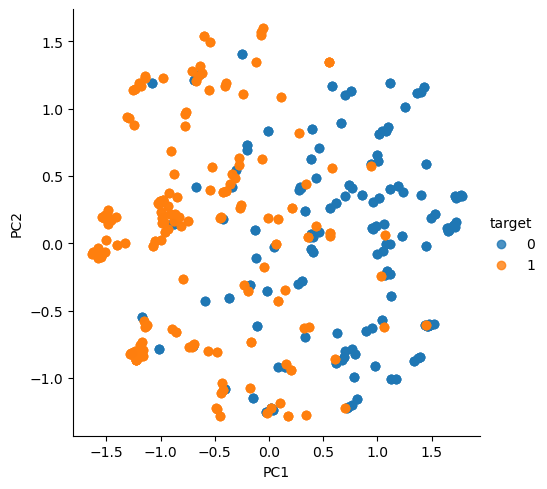

In [21]:
# plot PC1 and PC2 colored by columns
# the hue is categorical so the continuous values get a large legend, but ignore that for now.
for col in train_target.columns:
    if 'PC' in col:
        continue
    sns.lmplot(x='PC1', y='PC2', hue=col, data=train_target, fit_reg=False)
    plt.show()
# sns.lmplot(x='PC1',y='PC3',hue='sex',data=train_target,fit_reg=False)
# plt.show()
# Add some more plots


In [18]:
# printing the actual pc vectors:
(n, c) = X.shape
for i in range(c):
    pc_name = f'PC{i+1}'
    print(pc_name)
    for col, pca_ in zip(df.columns, list(pca.components_[i])):
        print(col, pca_)


PC1
age 0.03945397055171854
resting_blood_pressure 0.02206882687752436
cholesterol 0.01065454812331103
max_heart_rate -0.09685902003005405
st_depression 0.0967381292924041
num_major_vessels 0.08032244398669361
sex_female -0.1634930265721771
sex_male 0.1634930265721771
chest_pain_type_0 0.3481590914723548
chest_pain_type_atypical angina -0.1891417419331331
chest_pain_type_non-anginal pain -0.014139611045794784
chest_pain_type_typical angina -0.14487773849342692
fasting_blood_sugar_greater than 120mg/ml 0.02570126429450934
fasting_blood_sugar_lower than 120mg/ml -0.025701264294509342
rest_ecg_ST-T wave abnormality -0.15750766579289566
rest_ecg_left ventricular hypertrophy 0.006907665022224198
rest_ecg_normal 0.15060000077067143
exercise_induced_angina_no -0.35931792153556796
exercise_induced_angina_yes 0.35931792153556796
st_slope_0 0.021234302211121495
st_slope_flat -0.315865076441232
st_slope_upsloping 0.2946307742301107
thalassemia_0 0.0015667945914989764
thalassemia_fixed defect -0.3

/mnt/data/hong/anaconda3/envs/dl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/data/hong/anaconda3/envs/dl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


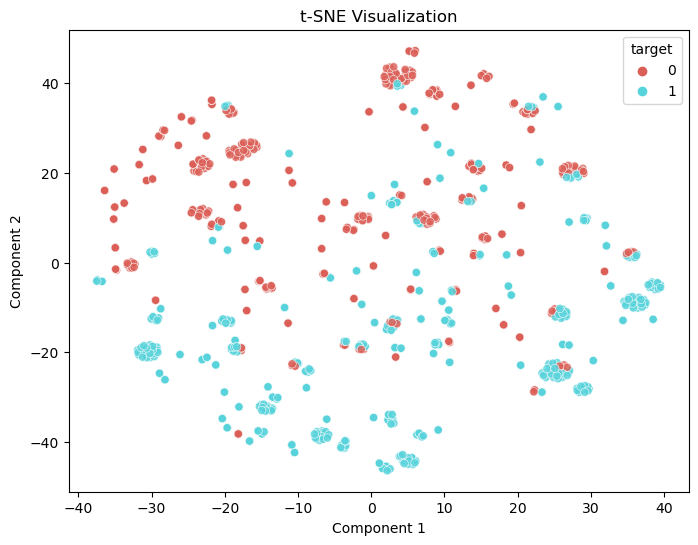

In [22]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


X = df_scaled
y = train_target['target']

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Convert the transformed data to a DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['component1', 'component2'])
tsne_df['target'] = y

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='component1', y='component2',
    hue='target',
    palette=sns.color_palette("hls", len(np.unique(y))),
    data=tsne_df,
    legend="full",
    alpha=0.8
)

# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization')

# Show the plot
plt.show()


In [23]:
train_target = train.copy()
train_target


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,0,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,flat,2,reversable defect,0
1,53,male,0,140,203,greater than 120mg/ml,normal,155,yes,3.1,0,0,reversable defect,0
2,70,male,0,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,0,0,reversable defect,0
3,61,male,0,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,flat,1,reversable defect,0
4,62,female,0,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,upsloping,3,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,typical angina,140,221,lower than 120mg/ml,ST-T wave abnormality,164,yes,0.0,flat,0,fixed defect,1
1021,60,male,0,125,258,lower than 120mg/ml,normal,141,yes,2.8,upsloping,1,reversable defect,0
1022,47,male,0,110,275,lower than 120mg/ml,normal,118,yes,1.0,upsloping,1,fixed defect,0
1023,50,female,0,110,254,lower than 120mg/ml,normal,159,no,0.0,flat,0,fixed defect,1
